# Pixel distribution of CXA datasets

Answer questions
- do we need to preprocess CXA-datasets before training a model on CXA-datasets?


In [1]:
import matplotlib.pyplot as plt
import livecell_tracker
import livecell_tracker.segment.datasets

tif_dir_path = r'''..\..\cxa-data\june_2022_data\restart_day2_Group 1_wellA1_RI_MIP_stitched'''
tif_img_dataset = livecell_tracker.segment.datasets.LiveCellImageDataset(tif_dir_path)


png_dir_path = r'''..\..\cxa-data\june_2022_data_8bit_png\restart_day2_Group 1_wellA1_RI_MIP_stitched'''
png_img_dataset = livecell_tracker.segment.datasets.LiveCellImageDataset(png_dir_path, ext="png")

576 tif img file paths loaded: 
576 png img file paths loaded: 


In [2]:
raw_pixels = tif_img_dataset[0].flatten();
# transformed_pixels = png_img_dataset[0].flatten();
transformed_img = livecell_tracker.segment.utils.normalize_img_by_zscore(tif_img_dataset[0])
transformed_pixels = livecell_tracker.segment.utils.normalize_img_by_zscore(tif_img_dataset[0]).flatten();

In [3]:
raw_pixels.mean(), transformed_pixels.mean()

(1.3378296, 9.967396)

In [4]:
raw_pixels.std(), transformed_pixels.std()

(0.0024106428, 4.9955306)

In [5]:
(tif_img_dataset[0] > (raw_pixels.mean() + raw_pixels.std())).shape

(2408, 2408)

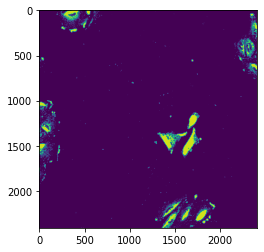

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def reserve_img_by_pixel_percentile(raw_img:np.array, percentile, target_val=None, scale=1):
    flattened_img = raw_img.copy().flatten()
    is_above_threshold = flattened_img > np.percentile(flattened_img, percentile)
    if target_val is not None:
        flattened_img[is_above_threshold] = target_val
    elif scale is not None:
        flattened_img[is_above_threshold] *= scale
    else:
        raise ValueError("Must specify either target_val or scale")
    flattened_img[np.logical_not(is_above_threshold)] = 0
    return flattened_img.reshape(raw_img.shape)

new_raw_img = reserve_img_by_pixel_percentile(tif_img_dataset[0], 97, scale=10)
plt.imshow(new_raw_img)


In [ ]:

new_transformed_img = reserve_img_by_pixel_percentile(transformed_img, 97, scale=10)
plt.imshow(new_transformed_img)


In [ ]:
import plotly.graph_objects as go
import numpy as np


fig = go.Figure()
fig.add_trace(go.Histogram(x=new_raw_img.flatten()[np.nonzero(new_raw_img.flatten())], name="raw"))
fig.add_trace(go.Histogram(x=new_transformed_img.flatten()[np.nonzero(new_transformed_img.flatten())], name="transformed"))

# The two histograms are drawn on top of another
fig.update_layout(barmode='stack')
fig.show()